In [73]:
#Import the necessary libraries 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.genmod.families import NegativeBinomial
from statsmodels.genmod.families.links import log, nbinom, cloglog, identity
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning) # To ignore potential KMeans future warnings

In [3]:
# Load the dataset
data = pd.read_excel("marketing_campaign1.xlsx")
# data = pd.read_excel("D:\\Excelr\\Data Science Project\\marketing_campaign1.xlsx")

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.shape

(2240, 29)

In [6]:
#Check for null values in the DataFrame
null_values = data.isnull().sum()

# Print the number of null values in each column
null_values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We have detected 24 null values in the "Income" column. We can either remove the null values or we can replace them with imputation method which depends on the data, analysis goals, and the percentage of missing values. If a small percentage of data is missing, we can drop them.

In [7]:
# Calculate the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Print the percentage of missing values
missing_percentage

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

As the percentage is low we can drop the null values

In [8]:
# Drop rows with any missing values
data.dropna(inplace=True)

In [9]:
data.shape

(2216, 29)

In [10]:
data.shape

(2216, 29)

In [11]:
# Selecting only numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns

In [12]:
# Calculate summary statistics for numerical columns
summary_stats = data.describe()

# Print the summary statistics
summary_stats

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,2013-07-10 11:29:27.509025280,49.012635,305.091606,26.356047,166.995939,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,174.500000,8.000000,68.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,505.000000,33.000000,232.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,NaN,28.948352,337.327920,39.793917,224.283273,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417


In [13]:
# Check for the duplicate values
duplicate=data.duplicated().sum()
print("\033[36m"f"The duplicates in the data is :{duplicate}"+"\033[4m")

The duplicates in the data is :0


# Visualizations:

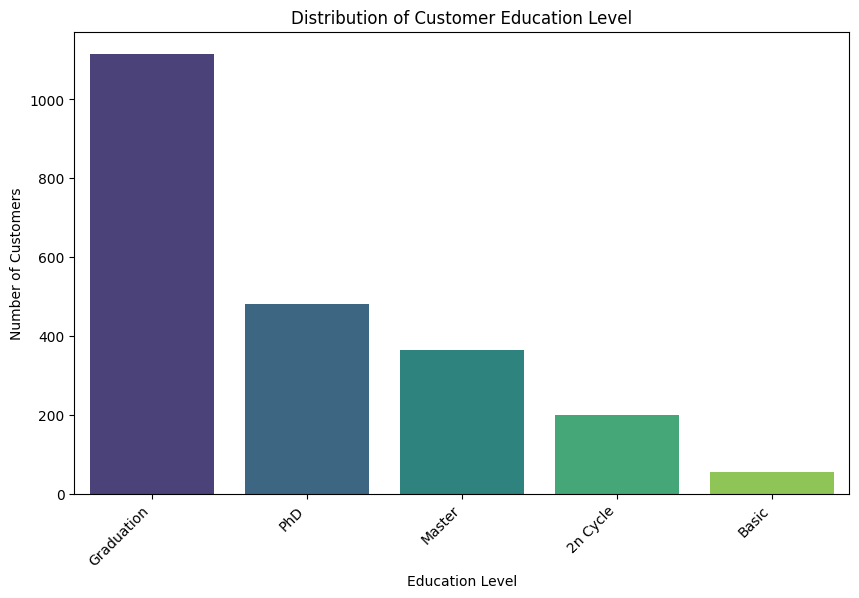

In [14]:
# Barplot to showcase distribution of customer education level
education_counts = data['Education'].value_counts()

# Create the barplot with different colors
plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette='viridis')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Education Level')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.show()

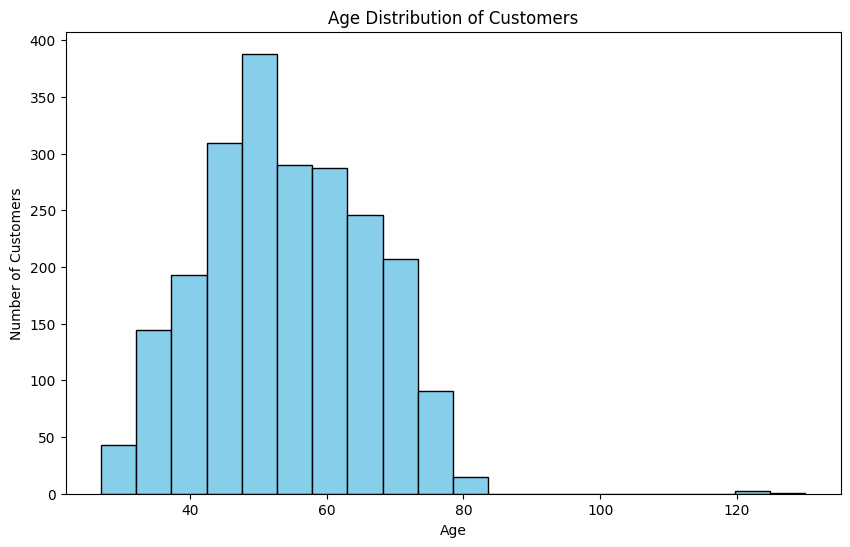

In [15]:
# Calculate the age distribution
data['Age'] = 2023 - data['Year_Birth']  # Calculate age based on current year (2023)

# Create a histogram of the age distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Age Distribution of Customers')
plt.show()


# Marital Status:


In [16]:
maritalstatus = data.Marital_Status.value_counts()

fig = px.pie(maritalstatus, 
             values = maritalstatus.values, 
             names = maritalstatus.index,
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label', 
                  marker = dict(line = dict(color = 'white', width = 4)))
fig.show()  

In [17]:
# 1. Feature Engineering: Create 'Age' feature (if not already done)
data['Age'] = 2023 - data['Year_Birth']

# 2. Feature Selection (example: selecting relevant features for clustering)
features_for_clustering = ['Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
data_selected = data[features_for_clustering]

### One-Hot Encoding

In [18]:
# Apply One-Hot Encoding for low-cardinality features
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    if col in data.columns:
        dummies = pd.get_dummies(data[col], prefix=col, drop_first=True)
        data.drop(col, axis=1, inplace=True)
        data = pd.concat([data, dummies], axis=1)

# Removing Outliers

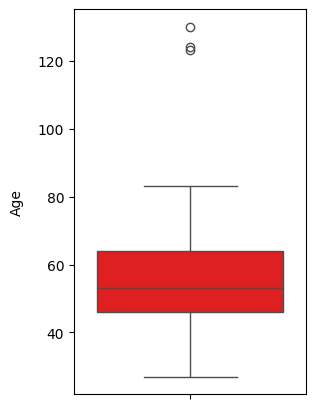

In [19]:
#showing outliers "age"
plt.figure(figsize=(3,5))
sns.boxplot(y=data.Age, color ='red');
plt.ylabel('Age', fontsize=10, labelpad=10);

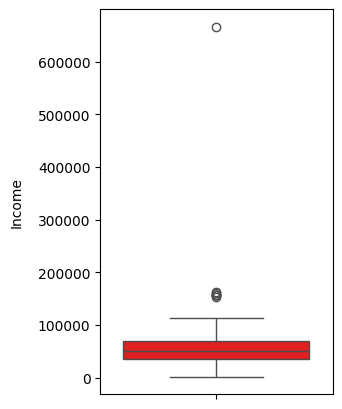

In [20]:
#showing outliers "Income"
plt.figure(figsize=(3,5))
sns.boxplot(y=data.Income, color ='red');
plt.ylabel('Income', fontsize=10, labelpad=10);

In [21]:
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# 1. Load Data
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

data_copy = data.copy()
print("Using existing DataFrames 'data_copy'.")
print("Original shape data_copy:", data_copy.shape)

Using existing DataFrames 'data_copy'.
Original shape data_copy: (2216, 39)


In [22]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2216 non-null   int64         
 1   Year_Birth               2216 non-null   int64         
 2   Income                   2216 non-null   float64       
 3   Kidhome                  2216 non-null   int64         
 4   Teenhome                 2216 non-null   int64         
 5   Dt_Customer              2216 non-null   datetime64[ns]
 6   Recency                  2216 non-null   int64         
 7   MntWines                 2216 non-null   int64         
 8   MntFruits                2216 non-null   int64         
 9   MntMeatProducts          2216 non-null   int64         
 10  MntFishProducts          2216 non-null   int64         
 11  MntSweetProducts         2216 non-null   int64         
 12  MntGoldProds             2216 non-null 

In [23]:
data_copy.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [24]:
data_copy['NumAcceptedCmps'] = data_copy[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum(axis=1)

In [25]:
columns_to_drop = ['ID', 'Year_Birth', 'Dt_Customer',
       'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

In [26]:
data_copy_encoded_selected_columns = data_copy.copy()
data_copy_encoded_selected_columns.drop(columns_to_drop,axis=1,inplace=True)

In [27]:
data_copy_encoded_selected_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2216 non-null   float64
 1   Kidhome                  2216 non-null   int64  
 2   Teenhome                 2216 non-null   int64  
 3   Recency                  2216 non-null   int64  
 4   MntWines                 2216 non-null   int64  
 5   MntFruits                2216 non-null   int64  
 6   MntMeatProducts          2216 non-null   int64  
 7   MntFishProducts          2216 non-null   int64  
 8   MntSweetProducts         2216 non-null   int64  
 9   MntGoldProds             2216 non-null   int64  
 10  NumDealsPurchases        2216 non-null   int64  
 11  NumWebPurchases          2216 non-null   int64  
 12  NumCatalogPurchases      2216 non-null   int64  
 13  NumStorePurchases        2216 non-null   int64  
 14  NumWebVisitsMonth        2216

In [28]:
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# 2. Initialize and Fit Isolation Forest
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Define the expected proportion of outliers (contamination)
# Adjust this value based on your domain knowledge or experimentation.
# Common values are between 0.01 (1%) and 0.1 (10%), or 'auto'.
contamination_level = 0.001

# Initialize the Isolation Forest model
# random_state ensures reproducibility
iso_forest = IsolationForest(n_estimators=100, # Number of trees in the forest
                             contamination=contamination_level,
                             random_state=42,
                             n_jobs=-1) # Use all available CPU cores

print(f"Initializing Isolation Forest with contamination={contamination_level}...")

# Fit the model to your primary dataset
# It learns the "normal" patterns from this data
iso_forest.fit(data_copy_encoded_selected_columns)

print("Model fitted.")

Initializing Isolation Forest with contamination=0.001...
Model fitted.


In [29]:
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# 3. Predict Outliers
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Predict outliers: returns 1 for inliers, -1 for outliers
# We predict on the same data we fit on to identify outliers within it
outlier_predictions = iso_forest.predict(data_copy_encoded_selected_columns)

In [30]:
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# 4. Filter DataFrames
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

# Create boolean masks to identify inliers
is_inlier = outlier_predictions == 1

# Count the number of outliers found
n_outliers_found = (outlier_predictions == -1).sum()
print(f"\nDetected {n_outliers_found} outliers ({n_outliers_found / len(data_copy_encoded_selected_columns):.2%}).")

# Create new DataFrames containing only the inliers
# Using .copy() is recommended to avoid SettingWithCopyWarning later
data_copy_encoded_selected_columns_no_outliers = data_copy_encoded_selected_columns[is_inlier].copy()

# IMPORTANT: Apply the *same* filtering logic (mask) to the copy
# This assumes data_copy_encoded_selected_columns has the same index and row order
# as data_copy_encoded_selected_columns *before* filtering.
if data_copy_encoded_selected_columns.index.equals(data_copy_encoded_selected_columns.index):
    data_copy_encoded_selected_columns_no_outliers = data_copy_encoded_selected_columns[is_inlier].copy()
    print("Filtered both DataFrames.")
else:
    print("\nWarning: Indices of 'data_copy_encoded_selected_columns' and 'data_copy_encoded_selected_columns' do not match.")
    print("Filtering only 'data_copy_encoded_selected_columns'. 'data_copy_no_outliers' will not be created correctly with this mask.")
    # Handle this case as needed - maybe fit/predict separately on the copy if it's different?
    data_copy_encoded_selected_columns_no_outliers = None # Or implement alternative logic


Detected 3 outliers (0.14%).
Filtered both DataFrames.


In [31]:
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---
# 5. Verify Results (Optional)
# --- --- --- --- --- --- --- --- --- --- --- --- --- --- --- ---

print("\n--- Results ---")
if data_copy_encoded_selected_columns_no_outliers is not None:
    print("\nShape of 'data_copy' BEFORE removal:", data_copy_encoded_selected_columns_no_outliers.shape)
    print("Shape of 'data_copy_no_outliers' AFTER removal:", data_copy_encoded_selected_columns_no_outliers.shape)

# Example: Display the first few rows of the cleaned data
print("\nCleaned data (first 5 rows):")
display(data_copy_encoded_selected_columns_no_outliers.head())


--- Results ---

Shape of 'data_copy' BEFORE removal: (2213, 28)
Shape of 'data_copy_no_outliers' AFTER removal: (2213, 28)

Cleaned data (first 5 rows):


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,NumAcceptedCmps
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,False,False,False,True,False,False,False,1
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,False,False,False,True,False,False,False,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,False,False,False,False,True,False,False,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,False,False,False,False,True,False,False,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,True,False,False,True,False,False,False,False,0


In [32]:
data_cleaned = data_copy_encoded_selected_columns_no_outliers

In [33]:
data_cleaned.shape

(2213, 28)

In [34]:
data_cleaned.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'NumAcceptedCmps'],
      dtype='object')

In [35]:
data_cleaned.select_dtypes(include=['int64','float64']).columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'NumAcceptedCmps'],
      dtype='object')

In [36]:
data_cleaned.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'NumAcceptedCmps'],
      dtype='object')

In [37]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2213 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2213 non-null   float64
 1   Kidhome                  2213 non-null   int64  
 2   Teenhome                 2213 non-null   int64  
 3   Recency                  2213 non-null   int64  
 4   MntWines                 2213 non-null   int64  
 5   MntFruits                2213 non-null   int64  
 6   MntMeatProducts          2213 non-null   int64  
 7   MntFishProducts          2213 non-null   int64  
 8   MntSweetProducts         2213 non-null   int64  
 9   MntGoldProds             2213 non-null   int64  
 10  NumDealsPurchases        2213 non-null   int64  
 11  NumWebPurchases          2213 non-null   int64  
 12  NumCatalogPurchases      2213 non-null   int64  
 13  NumStorePurchases        2213 non-null   int64  
 14  NumWebVisitsMonth        2213

In [38]:
selected_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines','MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

# Scaling the numerical features
scaler = StandardScaler()
scaled_data = data_cleaned.copy()
scaled_data[selected_columns] = scaler.fit_transform(scaled_data[selected_columns])

In [39]:
scaled_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'NumAcceptedCmps'],
      dtype='object')

### PCA Dimensionality reduction

In [40]:
# Applying PCA for dimensionality reduction
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

In [41]:
pca_data.shape

(2213, 18)

# K-MEANS

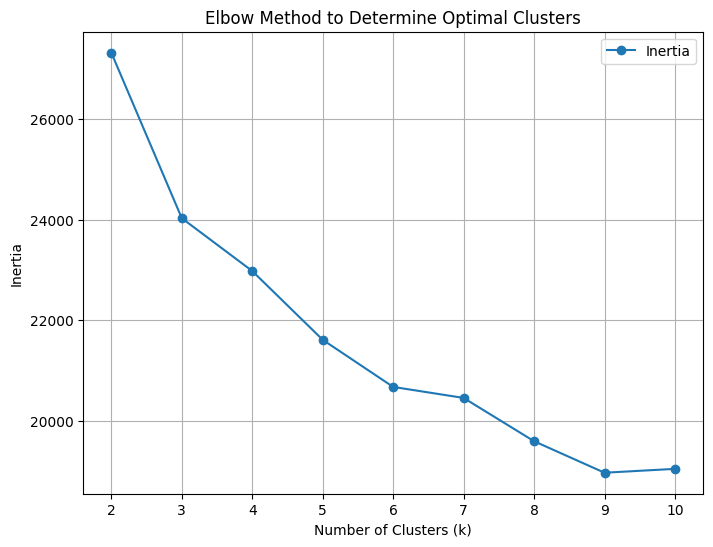

In [42]:
# Applying the elbow method to determine the optimal number of clusters
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_data)
    inertia.append(kmeans.inertia_)
    if len(set(labels)) > 1:  # Ensure more than one cluster for silhouette score
        silhouette_scores.append(silhouette_score(pca_data, labels))
    else:
        silhouette_scores.append(float('nan'))

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.grid()
plt.legend()
plt.show()

### Optimal Number of Clusters: 6 as the graph becomes flat at 6.

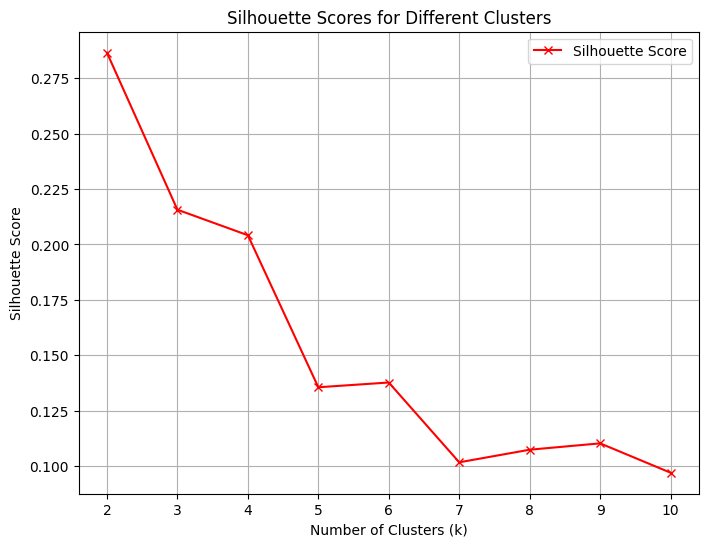

In [43]:
# Plotting silhouette scores
plt.figure(figsize=(8, 6))
plt.plot([k for k, score in zip(k_values, silhouette_scores) if not pd.isna(score)],
         [score for score in silhouette_scores if not pd.isna(score)],
         marker='x', color='red', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Clusters')
plt.grid()
plt.legend()
plt.show()

In [44]:
# Selecting the number of clusters that maximizes the silhouette score
# valid_scores = [(k, score) for k, score in zip(k_values, silhouette_scores) if not pd.isna(score)]
# optimal_k = max(valid_scores, key=lambda x: x[1])[0]
kmeans = KMeans(n_clusters=6, random_state=42)
labels_kmeans = kmeans.fit_predict(pca_data)

In [45]:
# Calculating and printing the final Silhouette Score
silhouette_avg = silhouette_score(pca_data, labels_kmeans)
print(f'Silhouette Score: {silhouette_avg.round(3)}')

Silhouette Score: 0.138


### k-means visualization

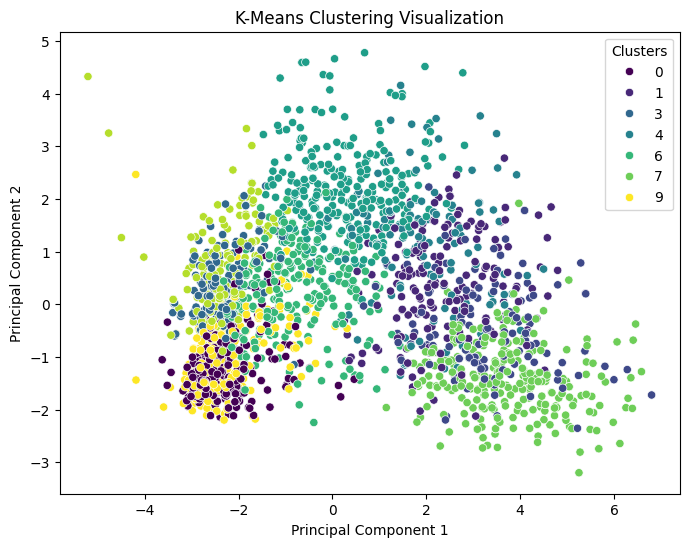

In [46]:
# Plotting clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='viridis')
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()

# Hierarchical Clustering:

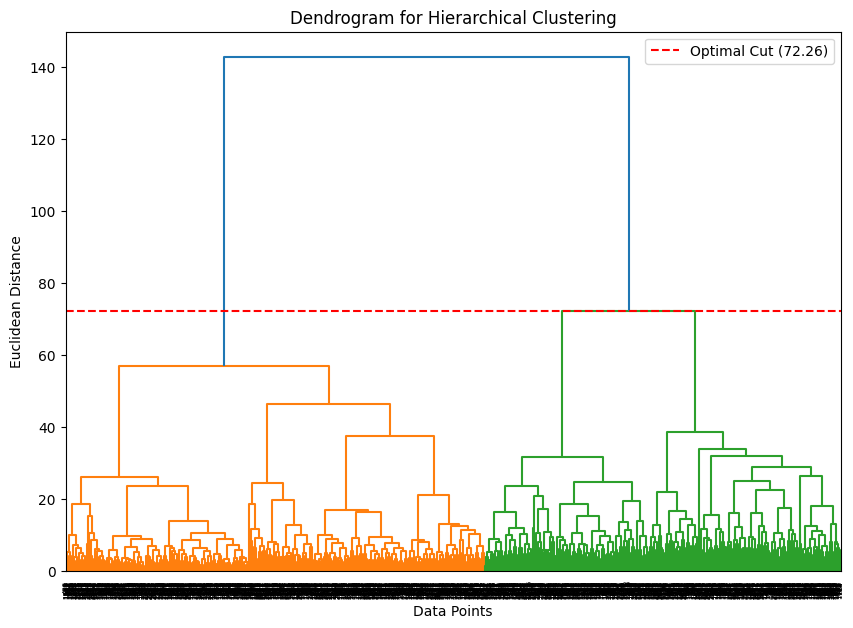

In [47]:
linkage_method = 'ward'
# Plotting the Dendrogram for Hierarchical Clustering
linked = linkage(pca_data, method=linkage_method)

# --- Determine the Optimal y-value ---
# Get the distances from the linkage matrix
distances = linked[:, 2] # The third column (index 2) of the linkage matrix contains the distances

# Calculate the differences between consecutive distances
diffs = np.diff(distances)

# Find the index of the largest difference
idx_largest_diff = np.argmax(diffs)

# Get the corresponding y-value (distance) for the line
optimal_y_value = distances[idx_largest_diff]

# --- Plotting the Dendrogram with Optimal Cut-off Line ---
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')

# Draw a horizontal line at the optimal y-value
plt.axhline(y=optimal_y_value, color='r', linestyle='--', label=f'Optimal Cut ({optimal_y_value:.2f})')
plt.legend()  # Show the label for the horizontal line
plt.show()

In [48]:
# Applying Agglomerative Clustering
optimal_clusters = 3  # Adjust based on the dendrogram result
agg_cluster = AgglomerativeClustering(n_clusters=optimal_clusters, linkage=linkage_method)
labels_hc = agg_cluster.fit_predict(pca_data)

In [49]:
# Calculate Silhouette Score
silhouette_avg = silhouette_score(pca_data, labels_hc)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1934156803106707


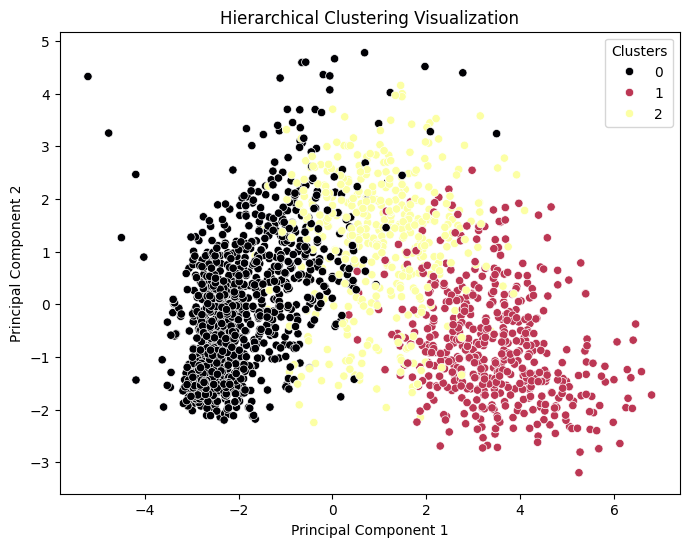

In [50]:
# Plotting clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_hc, palette='inferno')
plt.title('Hierarchical Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()

# DBSCAN:

In [51]:
# --- Function to Find Optimal DBSCAN Params ---
def find_dbscan_params(data_np, data_label, eps_values,min_samples_values=None,plot=False):
    """
    Helps find DBSCAN eps using k-distance plot and evaluates parameter combinations.
    """
    print(f"\n--- Analyzing Dataset: {data_label} ---")

    # --- Step 1: Estimate eps using k-distance plot ---
    # Rule of thumb for min_samples: 2 * dimensions
    min_samples_heuristic = 2 * data_np.shape[1]
    print(f"Using k = min_samples = {min_samples_heuristic} for k-distance plot heuristic.")

    # Calculate distances to k-th nearest neighbor
    neigh = NearestNeighbors(n_neighbors=min_samples_heuristic)
    nbrs = neigh.fit(data_np)
    distances, indices = nbrs.kneighbors(data_np)

    # Sort the distances to the k-th neighbor (the last column in distances)
    k_distances = np.sort(distances[:, min_samples_heuristic-1], axis=0)

    if plot:
        # Plot the k-distance graph
        plt.figure(figsize=(8, 5))
        plt.plot(k_distances)
        plt.title(f'k-Distance Graph for {data_label} (k={min_samples_heuristic})')
        plt.xlabel("Points sorted by distance")
        plt.ylabel(f"{min_samples_heuristic}-th Nearest Neighbor Distance")
        plt.grid(True)
        plt.show()
        print(f"----> Examine the plot above to find the 'elbow' point. This value is a good candidate for 'eps'.")

    # --- Step 2: Grid search around heuristic values ---
    # Define ranges based on the plot and min_samples heuristic
    # !!! ADJUST THESE RANGES BASED ON YOUR K-DISTANCE PLOT !!!
     # Example range, ADJUST THIS
    
    if min_samples_values is None:
        min_samples_values = [min_samples_heuristic - 10, min_samples_heuristic - 5, min_samples_heuristic, min_samples_heuristic + 5, min_samples_heuristic + 10]
        min_samples_values = [max(2, ms) for ms in min_samples_values] # Ensure min_samples >= 2
        print('min_samples_values based on min_samples_heurisitc:', min_samples_values)

    print(f"\nSearching eps in: {np.round(eps_values, 2)}")
    print(f"Searching min_samples in: {min_samples_values}")

    best_score = -1  # Initialize best score lower than possible silhouette
    best_eps = -1
    best_min_samples = -1
    results = []

    for eps in eps_values:
        for min_samples in min_samples_values:
            try:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1) # Use n_jobs=-1 for parallel processing
                labels = dbscan.fit_predict(data_np)

                # Identify unique cluster labels, excluding noise (-1)
                unique_labels = set(labels)
                num_clusters = len(unique_labels) - (1 if -1 in labels else 0)

                # Calculate Silhouette Score only if > 1 cluster is found (excluding noise)
                if num_clusters > 1:
                    # Filter out noise points for score calculation
                    non_noise_mask = (labels != -1)
                    if np.sum(non_noise_mask) > 0: # Check if there are any non-noise points
                        score = silhouette_score(data_np[non_noise_mask], labels[non_noise_mask])
                        print(f"  eps={eps:.2f}, min_samples={min_samples} -> Clusters={num_clusters}, Noise={np.sum(labels == -1)}, Score={score:.4f}")
                    else: # All points are noise
                        score = -1
                        print(f"  eps={eps:.2f}, min_samples={min_samples} -> Clusters={num_clusters}, Noise={len(labels)}, Score=N/A (all noise)")
                else:
                    score = -1 # Assign low score if only one cluster or all noise
                    print(f"  eps={eps:.2f}, min_samples={min_samples} -> Clusters={num_clusters}, Noise={np.sum(labels == -1)}, Score=N/A (<2 clusters)")

                results.append({'eps': eps, 'min_samples': min_samples, 'num_clusters': num_clusters, 'noise_points': np.sum(labels == -1), 'silhouette': score})

                # Update best score if current score is better and valid
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples

            except Exception as e:
                 print(f"  Error for eps={eps:.2f}, min_samples={min_samples}: {e}")
                 results.append({'eps': eps, 'min_samples': min_samples, 'num_clusters': -1, 'noise_points': -1, 'silhouette': -1})


    print(f"\nBest Parameters for {data_label}:")
    if best_eps != -1:
        print(f"  eps          = {best_eps:.4f}")
        print(f"  min_samples  = {best_min_samples}")
        print(f"  Best Silhouette Score = {best_score:.4f} (Note: High noise can affect interpretation)")
    else:
        print("  Could not find a valid clustering configuration with > 1 cluster.")

    return pd.DataFrame(results) # Return results for further inspection


--- Analyzing Dataset: Original Scaled Data ---
Using k = min_samples = 36 for k-distance plot heuristic.


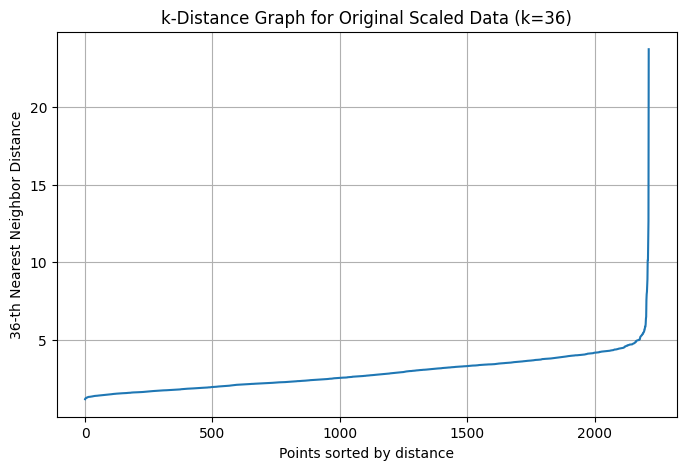

----> Examine the plot above to find the 'elbow' point. This value is a good candidate for 'eps'.
min_samples_values based on min_samples_heurisitc: [26, 31, 36, 41, 46]

Searching eps in: [ 1  2  3  4  5  6  7  8  9 10]
Searching min_samples in: [26, 31, 36, 41, 46]
  eps=1.00, min_samples=26 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=31 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=36 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=41 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=46 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=2.00, min_samples=26 -> Clusters=1, Noise=1273, Score=N/A (<2 clusters)
  eps=2.00, min_samples=31 -> Clusters=1, Noise=1341, Score=N/A (<2 clusters)
  eps=2.00, min_samples=36 -> Clusters=1, Noise=1364, Score=N/A (<2 clusters)
  eps=2.00, min_samples=41 -> Clusters=1, Noise=1384, Score=N/A (<2 clusters)
  eps=2.00, min_samples=46 -> 

In [52]:
# --- Run Analysis for Both Datasets ---
results_scaled = find_dbscan_params(pca_data, "Original Scaled Data",eps_values=range(1,11),plot=True)

print("\n--- Search Results Summary ---")
print("\nOriginal Scaled Data Results:")
print(results_scaled.sort_values(by='silhouette', ascending=False).head())

In [53]:
# --- Run Analysis for Both Datasets ---
results_scaled = find_dbscan_params(pca_data, "Original Scaled Data",eps_values=range(1,11), min_samples_values=[51,56,61,66])

print("\n--- Search Results Summary ---")
print("\nOriginal Scaled Data Results:")
print(results_scaled.sort_values(by='silhouette', ascending=False).head())


--- Analyzing Dataset: Original Scaled Data ---
Using k = min_samples = 36 for k-distance plot heuristic.

Searching eps in: [ 1  2  3  4  5  6  7  8  9 10]
Searching min_samples in: [51, 56, 61, 66]
  eps=1.00, min_samples=51 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=56 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=61 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=66 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=2.00, min_samples=51 -> Clusters=2, Noise=1456, Score=0.2056
  eps=2.00, min_samples=56 -> Clusters=1, Noise=1510, Score=N/A (<2 clusters)
  eps=2.00, min_samples=61 -> Clusters=1, Noise=1515, Score=N/A (<2 clusters)
  eps=2.00, min_samples=66 -> Clusters=1, Noise=1530, Score=N/A (<2 clusters)
  eps=3.00, min_samples=51 -> Clusters=1, Noise=635, Score=N/A (<2 clusters)
  eps=3.00, min_samples=56 -> Clusters=1, Noise=663, Score=N/A (<2 clusters)
  eps=3.00, min_samples=61 -> Cl

In [54]:
# --- Run Analysis for Both Datasets ---
results_scaled = find_dbscan_params(pca_data, "Original Scaled Data",eps_values=range(1,11), min_samples_values=[49,50,51,52,53])

print("\n--- Search Results Summary ---")
print("\nOriginal Scaled Data Results:")
print(results_scaled.sort_values(by='silhouette', ascending=False).head())


--- Analyzing Dataset: Original Scaled Data ---
Using k = min_samples = 36 for k-distance plot heuristic.

Searching eps in: [ 1  2  3  4  5  6  7  8  9 10]
Searching min_samples in: [49, 50, 51, 52, 53]
  eps=1.00, min_samples=49 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=50 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=51 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=52 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=1.00, min_samples=53 -> Clusters=0, Noise=2213, Score=N/A (<2 clusters)
  eps=2.00, min_samples=49 -> Clusters=3, Noise=1411, Score=0.1558
  eps=2.00, min_samples=50 -> Clusters=2, Noise=1454, Score=0.2050
  eps=2.00, min_samples=51 -> Clusters=2, Noise=1456, Score=0.2056
  eps=2.00, min_samples=52 -> Clusters=2, Noise=1456, Score=0.2056
  eps=2.00, min_samples=53 -> Clusters=2, Noise=1456, Score=0.2056
  eps=3.00, min_samples=49 -> Clusters=1, Noise=634, Score=N/A (<2 clu

In [55]:
# --- Optional: Apply DBSCAN with best parameters ---
# Example for original data (replace with actual best params found)
best_eps_found = 5
best_min_samples_found = 51
dbscan_final = DBSCAN(eps=best_eps_found, min_samples=best_min_samples_found, n_jobs=-1)
labels_dbscan = dbscan_final.fit_predict(pca_data)
print("\nFinal clustering with best params (Original Data):")
print(pd.Series(labels_dbscan).value_counts())


Final clustering with best params (Original Data):
 0    2201
-1      12
Name: count, dtype: int64


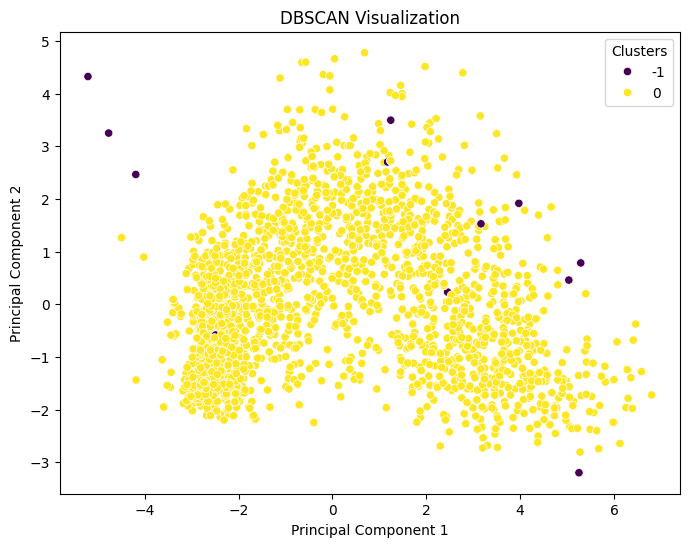

In [56]:
# Plotting clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels_dbscan, palette='viridis')
plt.title('DBSCAN Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()

In [57]:
scaled_data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'NumAcceptedCmps'],
      dtype='object')

# TSNE and DBSCAN

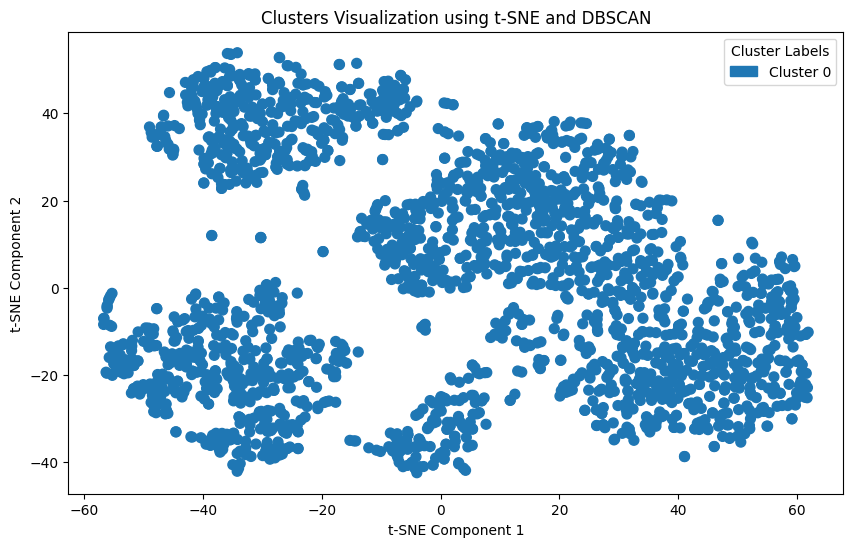

In [58]:

# Assuming pca_data is your input data
# pca_data = ...

# Step 1: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
reduced_data = tsne.fit_transform(pca_data)

# Step 2: Apply DBSCAN for clustering
dbscan = DBSCAN(eps=20, min_samples=80)
labels = dbscan.fit_predict(reduced_data)

# Step 3: Visualize the clusters with discrete colors and a legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', s=50)
plt.title('Clusters Visualization using t-SNE and DBSCAN')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Create a legend
unique_labels = np.unique(labels)
patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}') for label in unique_labels]
plt.legend(handles=patches, title='Cluster Labels', loc='best')

plt.show()

In [59]:
len(labels),labels.sum()

(2213, np.int64(0))

# TSNE and K-MEANS

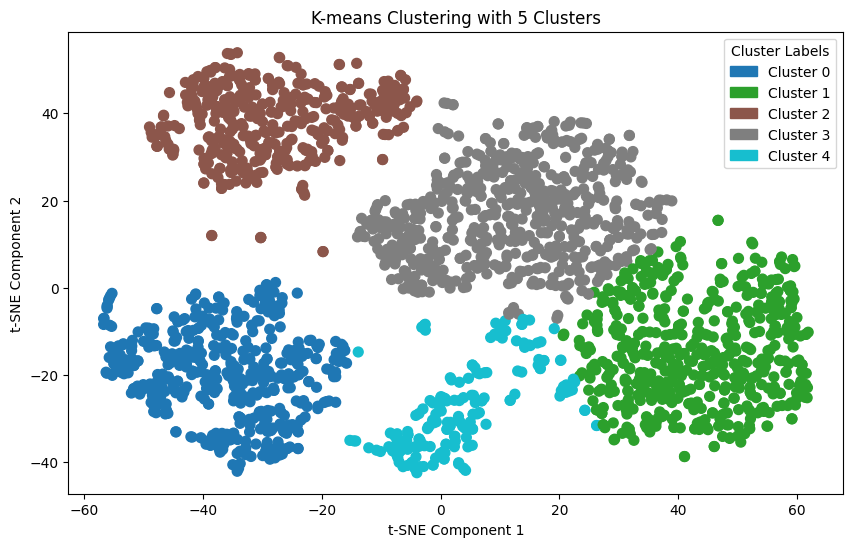

In [60]:

# Assuming reduced_data is your t-SNE reduced data
# reduced_data = ...

# Number of clusters observed visually from the t-SNE plot
n_clusters = 5  # Adjust based on visual inspection

# Step 1: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(reduced_data)

# Step 2: Visualize the clusters with a legend
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', s=50)
plt.title(f'K-means Clustering with {n_clusters} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Create a legend
unique_labels = np.unique(labels)
patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}') for label in unique_labels]
plt.legend(handles=patches, title='Cluster Labels', loc='best')

plt.show()

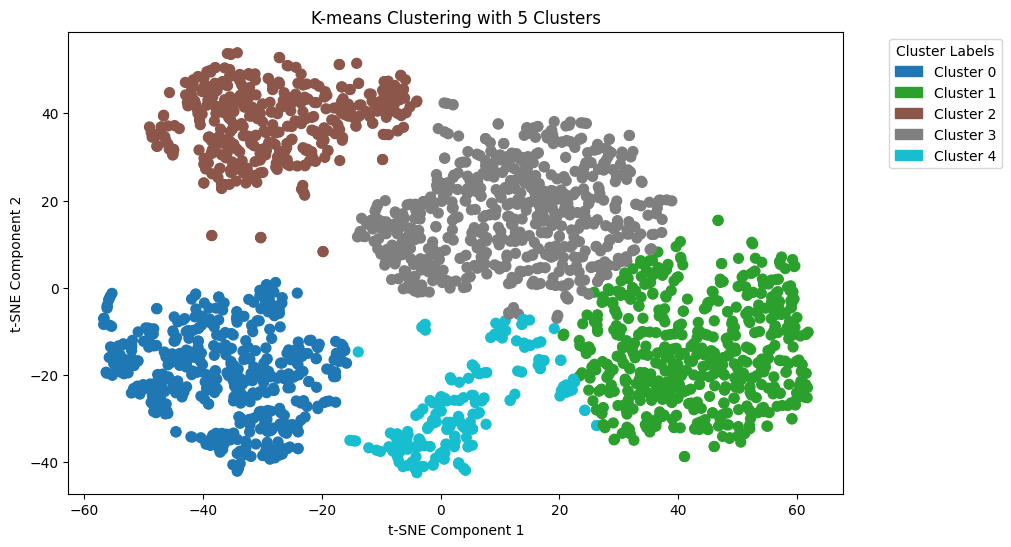

In [61]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming reduced_data is your t-SNE reduced data
# reduced_data = ...

# Number of clusters observed visually from the t-SNE plot
n_clusters = 5  # Adjust based on visual inspection

# Step 1: Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(reduced_data)

# Step 2: Visualize the clusters with a legend outside the plot at the top right
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='tab10', s=50)
plt.title(f'K-means Clustering with {n_clusters} Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# Create a legend
unique_labels = np.unique(labels)
patches = [mpatches.Patch(color=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}') for label in unique_labels]
plt.legend(handles=patches, title='Cluster Labels', loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

plt.show()

In [62]:
score = silhouette_score(reduced_data, labels)
score = round(score*1000)/1000
print(f"Silhouette Score: {score}")

Silhouette Score: 0.505


### Supervised Learning Model to predict NumAcceptedCmps, which is a count of total number of accepted campaigns from AcceptedCmp1 to 5 and Response

In [63]:
round(0.5099999904632568,3)

0.51

<Axes: >

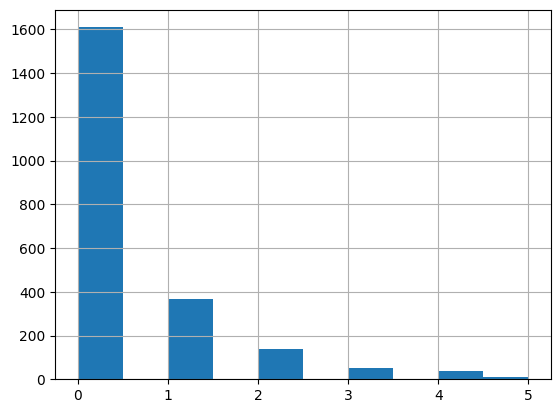

In [64]:
scaled_data.NumAcceptedCmps.hist()

In [78]:
scaled_data.NumAcceptedCmps.mean().round(3),(scaled_data.NumAcceptedCmps.std()**2).round(3)

(np.float64(0.448), np.float64(0.794))

In [80]:
alpha = (scaled_data.NumAcceptedCmps.std()**2).round(3)/scaled_data.NumAcceptedCmps.mean().round(3)
alpha.round(3)

np.float64(1.772)

**Overdispersion Coefficient** is calculated as:

$$
\text{Overdispersion Coefficient} = \frac{\text{Variance}}{\text{Mean}}
$$

For your data:

$$
\text{Overdispersion Coefficient} = \frac{0.794}{0.448} \approx 1.772
$$

**Suggested Range for Overdispersion Coefficient:**

*   **Poisson Distribution:** Overdispersion coefficient [0.8,1.2].
*   **Overdispersed Data:** Overdispersion coefficient > 1.

### Mean less than Variance, Overdispersion. So, cannot use poisson regression for count data. Let us use Negative Binomial Regression as variance greater than mean.

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(data,columns_to_exclude=None):
    # Calculate VIF for each feature in the dataset
    if columns_to_exclude:
        X = data.drop(columns_to_exclude, axis=1)
    else:
        X = data


    # Identify boolean columns and convert them to integers
    bool_columns = X.select_dtypes(include=bool).columns
    if len(bool_columns) > 0:
        X[bool_columns] = X[bool_columns].astype(int)



    print('We drop the response_variable or dependent_variable or target variable in VIF calculations.\nWe need to find collinearity among independent variables.')
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    print('Done')

    # Print the VIF results
    display(vif_data)
    display('VIF values <= 10', vif_data[vif_data['VIF'] <= 10])
    display('VIF values == inf', vif_data[vif_data['VIF'] == np.inf])
    display('fraction of non-multi-collinear variables:', round(len(vif_data[vif_data['VIF'] <= 10])/len(vif_data),3))

In [67]:
calculate_VIF(data_cleaned,'NumAcceptedCmps')

We drop the response_variable or dependent_variable or target variable in VIF calculations.
We need to find collinearity among independent variables.
Done


,Feature,VIF
0,Income,11.726651
1,Kidhome,3.159372
2,Teenhome,2.987129
3,Recency,3.895702
4,MntWines,5.074076
5,MntFruits,2.830482
6,MntMeatProducts,4.634009
7,MntFishProducts,3.126664
8,MntSweetProducts,2.775078
9,MntGoldProds,2.593492


'VIF values <= 10'

,Feature,VIF
1,Kidhome,3.159372
2,Teenhome,2.987129
3,Recency,3.895702
4,MntWines,5.074076
5,MntFruits,2.830482
6,MntMeatProducts,4.634009
7,MntFishProducts,3.126664
8,MntSweetProducts,2.775078
9,MntGoldProds,2.593492
10,NumDealsPurchases,4.144511


'VIF values == inf'

,Feature,VIF


'fraction of non-multi-collinear variables:'

0.778

In [68]:
data_cleaned.Income.sample(5)

954     46106.0
1366    47025.0
1625    54549.0
1329    71604.0
1732    37244.0
Name: Income, dtype: float64

In [69]:
scaled_data = data_cleaned
scaled_data['Income'] = StandardScaler().fit_transform(scaled_data[['Income']]).flatten()

# Define the features and target variable
X = scaled_data.drop('NumAcceptedCmps', axis=1)
X = X.astype(int)
y = scaled_data['NumAcceptedCmps']
y = y.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the count data columns (excluding binary columns and target variable)
count_columns = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

In [75]:
# X_train['Income'] = scaler.fit_transform(X_train['Income'])
# X_test['Income'] = scaler.transform(X_test['Income'])

# Add a constant to the features for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [81]:
# Fit the negative binomial regression model
model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial(alpha=alpha))
result = model.fit()

# Print the summary of the model
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        NumAcceptedCmps   No. Observations:                 1770
Model:                            GLM   Df Residuals:                     1742
Model Family:        NegativeBinomial   Df Model:                           27
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1346.6
Date:                Wed, 02 Apr 2025   Deviance:                       878.66
Time:                        09:14:48   Pearson chi2:                 1.17e+03
No. Iterations:                    57   Pseudo R-squ. (CS):             0.2175
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [82]:
# Make predictions on the training set
y_train_pred = result.predict(X_train)
y_train_pred_rounded = np.round(y_train_pred).astype(int)

# Make predictions on the test set
y_test_pred = result.predict(X_test)
y_test_pred_rounded = np.round(y_test_pred).astype(int)

In [84]:
sum_of_squared_errors = 0
sum_of_squared_errors_wrt_mean = 0
for i,j in zip(y_train_pred_rounded,y_train):
    sum_of_squared_errors += (i-j)**2

for i in y_train_pred_rounded:
    sum_of_squared_errors_wrt_mean += (i-np.round(y_train.mean()))**2


print(sum_of_squared_errors/sum_of_squared_errors_wrt_mean)

0.9999879608263185


In [85]:
sum_of_squared_errors = 0
sum_of_squared_errors_wrt_mean = 0
for i,j in zip(y_test_pred_rounded,y_test):
    sum_of_squared_errors += (i-j)**2

for i in y_test_pred_rounded:
    sum_of_squared_errors_wrt_mean += (i-np.round(y_train.mean()))**2


print(sum_of_squared_errors/sum_of_squared_errors_wrt_mean)

0.7837209302325582


In [ ]:
# # Function to calculate pseudo R² metrics
# def calculate_pseudo_r2(model, X, y):
#     log_likelihood_model = model.llf
#     # Fit the null model (intercept-only model)
#     null_model = sm.GLM(y, X[['const']], family=sm.families.NegativeBinomial(alpha=alpha))
#     null_result = null_model.fit()
#     log_likelihood_null = null_result.llf
    
#     n = len(y)
    
#     r2_mcfadden = 1 - (log_likelihood_model / log_likelihood_null)
#     r2_cox_snell = 1 - np.exp((log_likelihood_model - log_likelihood_null) * 2 / n)
#     r2_nagelkerke = r2_cox_snell / (1 - np.exp(log_likelihood_null * 2 / n))
    
#     return r2_mcfadden, r2_cox_snell, r2_nagelkerke


# # Calculate pseudo R² for the training set
# r2_train_mcfadden, r2_train_cox_snell, r2_train_nagelkerke = calculate_pseudo_r2(result, X_train, y_train)
# print(f'Training McFadden\'s R²: {round(r2_train_mcfadden, 3)}')
# print(f'Training Cox & Snell R²: {round(r2_train_cox_snell, 3)}')
# print(f'Training Nagelkerke R²: {round(r2_train_nagelkerke, 3)}')

# # Calculate MSE for the training set
# mse_train = mean_squared_error(y_train, y_train_pred_rounded)
# print(f'Mean Squared Error (Train): {round(mse_train, 3)}')

# # Calculate MSE for the test set
# mse_test = mean_squared_error(y_test, y_test_pred_rounded)
# print(f'Mean Squared Error (Test): {round(mse_test, 3)}')

# # Calculate the mean value of the target variable
# mean_value = y_train.mean()

# # Predict using the mean value for the training set
# y_train_mean_pred = np.full_like(y_train, mean_value)

# # Predict using the mean value for the test set
# y_test_mean_pred = np.full_like(y_test, mean_value)

# # Calculate Mean Squared Error for the model on the training set
# mse_train_model = mean_squared_error(y_train, y_train_pred_rounded)

# # Calculate Mean Squared Error for the model on the test set
# mse_test_model = mean_squared_error(y_test, y_test_pred_rounded)

# # Calculate Mean Squared Error for the mean value baseline on the training set
# mse_train_mean = mean_squared_error(y_train, y_train_mean_pred)

# # Calculate Mean Squared Error for the mean value baseline on the test set
# mse_test_mean = mean_squared_error(y_test, y_test_mean_pred)

# # Calculate Fraction of Error for the training set
# fraction_error_train = mse_train_model / mse_train_mean
# print(f'Fraction of Error (Train): {round(fraction_error_train, 3)}')

# # Calculate Fraction of Error for the test set
# fraction_error_test = mse_test_model / mse_test_mean
# print(f'Fraction of Error (Test): {round(fraction_error_test, 3)}')

Training McFadden's R²: 0.139
Training Cox & Snell R²: -0.278
Training Nagelkerke R²: -0.335


NameError: name 'mean_squared_error' is not defined